# Introduction
Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. It's known for its effectiveness in handling high dimensional data and its ability to perform well even with limited training data.

### Classification with SVMs
- The core idea is to find an optimal hyperplane that separates the data points of different classes with the maximum margin.
- A hyperplane is a decision boundary in n-dimensional space (n = number of features).
- The margin is the distance between the hyperplane and the closest data points from each class called the support vectors.
- SVMs aim to maximize this margin, which intuitively leads to a better separation between classes and potentially a better generalization to unseen data.

### Key components
- Support vectors: These are the data points closest to the hyperplane that define the margin. They are crucial for training the model and influence the classification of new data points.
- Kernel trick: This technique allows SVMs to handle non-linearly separable data. It essentially transforms the data into a higher-dimensional space where a linear separation might be possible. Common kernels include, linear, polynomial, and radial basis function (RBF).

### Advantages of SVMs
- Effective in high-dimensional spaces: SVMs can perform well even with a large number of features, making them suitable for complex datasets.
- Robust to overfitting: The focus on maximizing the margin can help reduce overfitting, especially when dealing with limited training data.
- Interpretability: In some cases, the decision boundary learned by the SVM can be visualized and interpreted, providing insights into the model's behavior.

### Disadvantages of SVMs
- Can be computationally expensive: Training SVMs can be slower than some other algorithms, especially for large datasets.
- Parameter tuning: Choosing the right kernel and its hyperparameters is crucial for optimal performance and can involve experimentation.
- Not ideal for very high-dimensional data: While SVMs can handle high dimensions, extremely high dimensionality can still pose challenges.

### Applications of SVMs
- Text classification (spam detection, sentiment analysis).
- Image classification (object detection, handwriting recognition).
- Bioinformatic data analysis (gene expression analysis).
- Anomaly detection (fraud detection, system intrusion detection).

# SVM Algorithm
### 1. Data representation
- Each data point is represented as a vector of features ($x_i$) with a corresponding class label ($y_i$).
- For example, if classifying emails as spam or ham, features might include frequencies, and class labels would be 1 (spam) or 0 (ham).

### 2. Hyperplane
- The goal is to find a hyperplane (a decision boundary) in the feature space that separates the data points of different classes with the maximum margin.
- The margin is the distance between the hyperplane and the closest data points from each class, called support vectors.

### 3. Support vectors
- These are the most critical training instances that define the margin.
- They are typically the data points closest to the hyperplane on either side, one for each class.
- The intuition is that these points have the most influence on the classification of new data points.

### 4. Maximizing the margin
- The SVM algorithm aims to maximize the margin between the hyperplane and the support vectors.
- A larger margin intuitively leads to a better separation between classes and potentially better generalization to unseen data.

### 5. Kernel trick (for non-linear data)
- In some cases, the data might not be linearly separable in the original feature space.
- The kernel trick addresses this by transforming the data into a higher-dimensional space where a linear separation might be possible.
- Common kernel functions include,
    - Linear kernel (for already linearly separable data).
    - Polynomial kernel (transforms data to a higher-dimensional polynomial space).
    - Radial Basis Function (RBF) kernel (projects data into a high-dimensional space using a Radial Basis Function).

### 6. Classification of new data points
Once the SVM is trained (hyperplane and support vectors identified), a new data point is classified by,
- Transforming the data points into the same feature space as the training data (if using a kernel).
- Calculating the distaance from the new point to the hyperplane.
- Assigning the class label based on which side of the hyperplane the new point falls on.

### Mathematical formulation (simplified)
The decision for an SVM with a linear kernel can be expressed as, $f(x) = w^T * x + w_0$. Where,
- $w$ = Weight vector (normal to the hyperplane).
- $w_0$ = Bias term.
- $x$ = New data point.

The goal is to find $w$ and $w_0$ that maximize the margin while correctly classifying all training points. This involves solving a constrained optimization proble,

### Learning algorithms
Several algorithms are used to train SVMs, including, Sequential Minimal Optimization (SMO), a popular algorithm that efficiently solves the optimization problem for finding the optimal hyperplane.

# Maximum Margin Classifier
### Problem
The task is to classify data points (positive - green, negative - red) into separate classes using a hyperplace (decision boundary).

### Challenge
Choosing the "best" hyperplane among many possible ones.

### Traditional approach
Previously, algorithms might have considered all data points and evaluated different hyperplanes based on some criteria.

### Maximum Margin Classifier (MMC)
This approach focuses on maximizing the margin between the hyperplane and the closest data points (support vectors) from each class.

### Key points
1. Margin: The distance between the hyperplane and the closest data points (one from each class) on either side.
2. Support vectors: These are the data points closest to the hyperplane and define the margin.
3. Intuition: A larger margin intuitively leads to better separation between classes and potentially better generalization to unseen data.

### Why support vectors?
Instead of considering all data points, MMC only focuses on support vectors because,
- They have the most influence on the classification of new data points.
- Maximizing the margin around them ensures a good separation between classes for most other points as well.

### Finding the best hyperplane
1. Consider 2 hyperplanes ($\pi_1$ and $\pi_2$) and their corresponding support vectors.
2. Create parallel lines ($\pi+$ and $\pi-$) on either side of each hyperplane, touching the support vectors.
3. Calculate the distance between these parallel lines ($d_1$ and $d_2$) for each hyperplane.
4. The hyperplane with the larger distance (larger margin) between its parallel lines is considered better (higher $d$ is better).

### Formalization and optimization
- The equation of a hyperplane can be expressed as, $w^T * x + w_0 = 0$. Where, $w$ = weight vector, and $w_0$ = bias term.
- The margin has to be maximized, which can be classified as $\frac{2 * k}{||w||}$. Where, k = distance between the hyperplane and its parallel lines.
- However, the objective founction becomes, $\argmin_{w, w_0} \frac{||w||}{2}$ due to the inverse relationship.

### Why not just minimize $||w||$?
Minimizing $||w||$ alone does not gurantee a good separation. The hyperplane could collapse onto the support vectors, leading to poor performance on unseen data.

### Constraints
- To prevent the hyperplane from collapsing and to ensure a good separation, additional constraints are required (introduced in Hard Margin SVM, a specific MMC implementation).
- These constraints typically penalize misclassifications of support vectors.

### Summary
The Maximum Margin Classifier focuses on maximizing the margin between the hyperplane and the closest data points (support vectors) to achieve good separation between classes and potentially better generalization to unseen data.

# Hard Margin Classifier
### Labeling in SVM
SVM uses labels +1 and -1 for positive and negative classes respectively. This is just a convention and doesn't affect the underlying concepts.

### Constraints for hard margin
- A hard margin classifier enforces stricter constraints compared to Maximum Margin Classifier (MMC).
- It requires no points to be misclassified and lie between the hyperplane and the support vectors.

### Formalizing the constraints
- Two hyperplanes are defines, $\pi+$ (above the decision boundary) and $\pi-$ (below the decision boundary).
- Every green point should satisfy $(w^T . x_i) * y_i >= 1$ (where $y_i$ is +1 for green points). This ensures they lie above $\pi+$.
- Every red point should satisfy $(w^T . x_i) * y_i <= 1$ (where $y_i$ is -1 for red points). This ensures they lie below $\pi-$.

### Functional margin
- The functional margin is defined as the margin multiplied by the label ($y_i$).
- This ensures both green points (positive label) and red points (negative label) have a positive functional margin.

### Verifying correct classification
- To check for misclassification, a point is multiplied with its label and is plugged into the equation.
- A correctly classified point (either green or red) will always result in a positive value after this multiplication.

### Challenges of hard margin
- The strict constraint of no misclassification can be difficuly to achieve in practive, especially for datasets that are not perfectly linearly separable.
- If the data is not linearly separable, a Hard Margin Classifier might not be able to find a valid hyperplane that satisfies the constraint for all points.

### Why "hard" margin?
- This approach is called as Hard Margin Classifier because it enforces a strict "all or nothing" rule. There is no room for even a single misclassification.
- This makes it ideal only for scenarios with perfectly linearly separable data points, which can be rare in real-world datasets.

### Limitations and Soft Margin Classifiers
- Due to its rigid constraints, Hard Margin Classifiers can be impractical for real-world problems.
- Soft Margin Classifiers addresses this by allowing a certain degree of misclassification. This allows them to handle non-lineraly separable data while still aiming for a good margin.

### Summary
Hard Margin Classifier is a powerful concept but has limitations due to its strict requirement of perfect separation. While it serves as a theoretical foundation for understanding maximum margin classification, Soft Margin Classifiers offer a more practical solution for mst real-world tasks where data might not be perfectly separable.

# Soft Margin Classifier
### Limitations of Hard Margin Classifiers
- Hard Margin Classifiers enforce a strict constraints of no misclassifications.
- This can be unrealistic for real-world datasets that might not be perfectly linearly separable.

### Soft margins
- Soft Margin Classifiers address this limitation by allowing a certain degree of misclassification.
- This allows for more flexibility in handling non-ideal data while still aiming for a good separation between classes.

### Error calculation
- In soft margin classification, an error term ($E_i$) is defined for each data point.
- This error represents the deviation of a point from its ideal distance to the margin (typically 1 unit).
- This error is calculated as, $E_i = 1 - Z_i$ , where $Z_i$ is the output of $(w^T . x_i) + w_0$ for the point.

### Constraint relaxation
- Unlike Hard Margin Classifiers where, $Z_i * y_i >= 1$ must always hold, Soft Margin Classifiers introduce a slack variable ($\xi_i$) (pronounced, xi).
- The constraint becomes $Z_i * y_i >= 1 - E_i$ (with $\xi_i >= 0$). This allows points to violate the margin by a certain amount ($E_i$) as long as the slack variable ($\xi_i$) is non-negative.

### Loss function with soft margin
The objective function in Soft Margin Classifiers aims to minimize two things,
- The norm of the weight vector (w) - similar to Hard Margins (encourages a large margin).
- The total error caused by misclassifications (sum of $E_i$).

### Ignoring irrelevant errors
- The points that are correctly classfied are not penalized even if they fall within the margin ($E_i < 0$).
- The slack variable ($\xi_i$) ensures a loss of zero for such points (since $\xi_i$ is non-negative).

### Trade-off parameter ($C$)
- The degree to which misclassifications are tolerated is controlled by a hyperparameter called $C$.
- A higher $C$ emphasizes a larger margin, potentially leading to stricter classification but might be less robust to noise.
- A lower $C$ allows for more misclassifications but might result in a smaller margin and potentially lower performance on unseen data.

### Summary
Soft Margin Classifiers offer a more practical approach for real-world data by allowing some degree of misclassification. They introduce a trade-off between maximizing the margin and minimizing errors, controlled by the hyperparameter $C$. This flexibility makes them widely used in various machine learning tasks, particularly when dealing with non-linearly separable data.

# Intuition Of Hinge Loss
### Scenario
Imagine a line ($\pi$) representing the decision boundary in an SVM with positive margins ($\pi+$) and negative margins ($\pi-$). Say that there are 4 data points ($x_1$, $x_2$, $x_3$, $x_4$) labeled positive ($y_i = +1$).

### Points and their classification
- $x_1$: Lies above $\pi+$ (correctly classified).
- $x_2$: Lies on $\pi+$ (correctly classified on the margin).
- $x_3$: Lies on $\pi$ (correctly classifies on the decision boundary).
- $x_4$: Lies on $\pi-$ (misclassified on the negative margin).

### Hinge loss and errors
- Hinge loss penalizes points that fall within the margin or are misclassified. The further a point deviates from the correct side of the margin, the higher the loss.
- Errors ($E_i$) are calculated as, $E_i = 1 - Z_i$ , where $Z_i$ is the output of $(w^T . x_i) + w_0$ for the point.

### Observations
- $x_1$ is correctly classified ($Z_i > 1$), so its error is $E_i = 0$ and hinge loss is 0 (no penatly).
- $x_2$ is also correctly classified ($Z_i = 1$), so its error is $E_i = 0$ and hinge loss is 0 (no penatly).
- $x_3$ lies on the decision boundary ($Z_i = 0$), leading to $E_i = 1$ and a hinge loss of 1 (maximum penalty for points on the boundary).
- $X_4$ is misclassified ($Z_i < 0$), resulting in positive error ($E_i$) and a hinge loss that increases as $Z_i$ becomes more negative.

### Hinge loss function
Based on the observations, the observation, the hinge loss function can be simplified as,
- $\text{Hinge Loss}(Z_i) = \max(0, (1 - Z_i))$.
- This function ensures no penalty for correctly classified points ($Z_i >= 1$) and increasing penalties for points deviating from the correct side of the margin.

### Comparison with Logistic Regression
- Logistic Regression uses Log-Loss, which assigns probabilities (0 to 1) to classes. It penalizes the model based on the difference between predicted and actual probabilities.
- SVM uses hinge loss, which works with labels (-1, +1) and focuses on maximizing the margin. It penalizes points that violate the margin or are misclassified.

### Summary
Hinge loss is a core concept in SVMs. It encourages a larger margin by heavily penalizing points that fall within the margin or are misclassified. This focus on the margin helps SVMs achieve good separation between classes, especially for data that might not be perfectly linear.

# Code Implementation Of SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
df = pd.read_csv("spam_clean.csv", encoding = "latin-1")
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df["type"].value_counts(normalize = True)

type
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [5]:
import ssl
import nltk

ssl._create_default_https_context = ssl._create_unverified_context
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vidishsirdesai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vidishsirdesai/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vidishsirdesai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# a simple text processing function
import re

def clean_tokenized_sentence(sentence):
    """
    Performs basic cleaning of tokenized sentence.
    """
    # an empty string to store the processes sentence
    cleaned_sentence = ""
    words = nltk.word_tokenize(sentence)
    for word in words:
        # convert to lowercase
        cleaned_word = word.lower()
        # remove punctuations by substitution
        cleaned_word = re.sub(r"[^\w\s]", "", cleaned_word)

        # remove stopwords
        if cleaned_word != "" and cleaned_word not in nltk.corpus.stopwords.words("english"):
            # append the processed words to new list
            cleaned_sentence = cleaned_sentence + " " + cleaned_word
        
    return (cleaned_sentence.strip())

In [7]:
# apply the text cleaning function to the dataset
df["cleaned_message"] = df["message"].apply(clean_tokenized_sentence)
df.sample(10)

,type,message,cleaned_message
2552,ham,"Oh fine, I'll be by tonight",oh fine tonight
2971,ham,Sary just need Tim in the bollox &it hurt him ...,sary need tim bollox hurt lot tol
1424,ham,Yes.. now only saw your message..,yes saw message
1313,ham,How abt making some of the pics bigger?,abt making pics bigger
3810,ham,Excellent! Wish we were together right now!,excellent wish together right
4190,ham,"Each Moment in a day,has its own value-Morning...",moment day valuemorning brings hope afternoon ...
4233,ham,Now only i reached home. . . I am very tired n...,reached home tired come tomorro
5297,ham,My darling sister. How are you doing. When's s...,darling sister school resuming minimum wait pe...
1841,ham,I am in your office na.,office na
2519,ham,Ok. I only ask abt e movie. U wan ktv oso?,ok ask abt e movie u wan ktv oso


In [8]:
df["cleaned_message"] = df["cleaned_message"].astype(str)

In [9]:
# dropping the "message" column
df.drop(columns = ["message"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             5572 non-null   object
 1   cleaned_message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# encoding the target column "type"
def encode_type(i):
    encode = {
        "spam": 1,
        "ham": 0
    }
    return encode[i]

df["type"] = df["type"].apply(encode_type)
# df["type"] = df["type"].apply({"spam": 1, "ham": 0})
df.sample(10)

,type,cleaned_message
3317,0,freezing craving ice fml
5295,0,alex says ok ok
1963,0,yes completely form clark also utter waste
3129,0,ok finish 6
2650,0,like shaking booty dance floor
1119,1,bored speed dating try speedchat txt speedchat...
814,1,u outbid simonwatson5120 shinco dvd plyr 2 bid...
4589,0,tomorrow going theatre come wherever u call te...
3919,1,free ringtone reply real poly eg real1 1 pushb...
1049,1,18 days euro2004 kickoff u kept informed lates...


In [11]:
# performing train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df["cleaned_message"], df["type"], test_size = 0.25, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4179,), (1393,), (4179,), (1393,))

In [12]:
# converting to bag of words and then to features
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
# converts to BoW and then to features
x_test = vectorizer.transform(x_test)
# size of the bag
x_train.shape, x_test.shape

((4179, 7612), (1393, 7612))

In [13]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean = False)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((4179, 7612), (1393, 7612))

In [14]:
# Support Vector Classifier (SVC)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

sv_classifier = SVC(class_weight = {0: 0.1, 1: 0.50}, kernel = "linear")
sv_classifier_grid_search = GridSearchCV(sv_classifier, params, scoring = "f1", cv = 3)
sv_classifier_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 0.1, 1: 0.5}, kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [15]:
res = sv_classifier_grid_search.cv_results_

for i in range(len(res["params"])):
    print(f"Parameters: {res['params'][i]}")
    print(f"Mean score: {res['mean_test_score'][i]}")
    print(f"Rank: {res['rank_test_score'][i]}")
    print()

Parameters: {'C': 0.0001}
Mean score: 0.6497817092458725
Rank: 6

Parameters: {'C': 0.001}
Mean score: 0.7839609357761171
Rank: 1

Parameters: {'C': 0.01}
Mean score: 0.7788439544939494
Rank: 2

Parameters: {'C': 0.1}
Mean score: 0.7692010027948709
Rank: 3

Parameters: {'C': 1}
Mean score: 0.7692010027948709
Rank: 3

Parameters: {'C': 10}
Mean score: 0.7692010027948709
Rank: 3



In [16]:
# implementing SVC with the best hyperparameter as found
sv_classifier = SVC(C = 0.001, class_weight = {0: 0.1, 1:0.5}, kernel = "linear")
sv_classifier.fit(x_train, y_train)

SVC(C=0.001, class_weight={0: 0.1, 1: 0.5}, kernel='linear')

In [17]:
y_pred = sv_classifier.predict(x_test)

In [18]:
from sklearn.metrics import f1_score

np.round(f1_score(y_test, y_pred), 2)

np.float64(0.88)

# Primal And Dual Formulations Of SVM
### Primal form of SVM
- Equation: $\min(w, b) \frac{||w||}{2} + \frac{C}{N} \sum_{i = 1}^{n} E_i \text{, such that } (w.T * x_{query} + b) * y_i >= 1 - E_i \text{, for all } i = 1 to n$.
- The target is to minimize a function that has 2 parts,
    - Regularization term: $\frac{||w||}{2}$ penalizes large values of the weight vector w. This helps to prevent overfitting by keeping the model complexity under control.
    - Hinge loss term: $\frac{C}{N} \sum_{i = 1}^{n} E_i$ measures the total error made by the model on the training data. $E_i$ represents the slack variable for data points $i$, indicating the amount by which the model's prediction deviates from the true label for that point. $C$ is a regularization parameter that controls the trade-off between maximizing the margin and allowing for some misclassification.
- The constraints: $(w^T * x_i + b) * y_i >= 1 - E_i$ ensures that for all data points $i$,
    - The decision boundary separates correctly classified points by a margin of atleast 1.
    - The slack variable ($E_i$) allows for some misclassification by permitting violations of the margin with a penalty in the loss term.
- Solving the primal form can be computationally expensive, especially for large datasets. This is because it involves optimizing a non-smooth function (hinge loss) with respect to $w$ and $b$.

### Dual form of SVM
- Equation: $\max(\alpha_i) (\sum_{i = 1}^{n}\alpha_i) - (\frac{1}{2} \sum_{i = 1}^{n} \sum_{j = 1}^{n}\alpha_i * \alpha_j * y_i * y_j * x_i^T . x_j), \text{ such that } 0 <= α_i <= C, \text{ and } \sum_{i = 1}^{n} \alpha_i * y_i = 0$.
- The dual form of the SVM provides an alternative way to solve the same optimization problem. It utilizes a concept called Lagrange duality to introduce Lagrange multipliers ($\alpha_i$) and convert the problem into maximizing a function with respect to these multipliers. This new formulation often leads to more efficient optimization process.
- Breakdown of dual form:
    - The dual form involves maximizing a function based on the Lagrange multipliers ($\alpha_i$).
    - The dual form avoids explicit calculations of $w$ and $w_0$ and instead focuses on the $\alpha_i$ which are associated with each data point.
    - The dual form also includes constraints on the $\alpha_i$ to ensure they fall within a specific range and satisfy a specific condition.

### Dual form and support vectors (SVs)
The key connection between dual form and SVs lies in the Lagrange multipliers ($\alpha_i$). These multipliers play a crucial role in identifying the most important data points for defining the decision boundary.
- Non-zero $\alpha_i$: Data points with $\alpha_i$ greater than 0 are considered SVs. These are points that lie closest to the decision boundary or violate the margin in the primal form. They are the most informative points for the model and significantly influence the classification.
- Zero $\alpha_i$: Data point with $\alpha_i$ equal to zero are irrelevant for the decision boundary in the dual form. They either lie far away from the margin or are correctly classified with a large margin. These points contribute minimally to the model's prediction.

### Misclassification and the soft margin
The primal form allows for some misclassifications through the slack variables $E_i$ and the $C$ parameter.This is known as Soft Margin SVM. By introducing these slack variables, the model can tolerate some errors on the training data in exchange for a potentially better generalization to unseen data. The $C$ parameter controls the severity of the penalty for misclassifications. A higher $C$ enforces a larger margin and reduces misclassification, while a lower $C$ allows for more misclassification on the training data but might lead to better generalization.

### Prediction in the dual form
For a new data point ($x_{query}$), the prediction is made using a weighted sum of the features of the support vectors ($x_i$). The weights are determined by the corresponding Lagrange multipliers ($\alpha_i$) and the labels ($y_i$) of the support vectors. Only the support vectors contribute to the prediction since their $\alpha_i$ values are non-zero.

### Summary
The dual form of SVM offers a computationally efficient way to solve the SVM optimization problem. It identifies a subset of data points (support vectors) that are most crucial for defining the decision boundary. By allowing for some misclassifications with the soft margin approach, the model can achieve better generalization on unseen data. In practice, during prediction, only the features and labels of the support vectors and the corresponding Lagrange multipliers are needed, making the model memory-efficient.

### Additional notes
The primal form is useful for interpreting the model's decision boundary. However, the dual form is often preferred for solving optimization problems, especially when dealing with large datasets or high-dimensional feature spaces.

# Kernels
The concept of kernels in SVMs hinges on the idea of replacing the dot product with a more general similarity measure.

### Dot product and similarity
The dot product of two vectors ($x_i^T * x_j$) captures their linear similarity. A higher dot product indicates greater alognment in the same direction.

### Limitations of linear SVMs
- Linear SVMs can only create linear decision boundaries, which are essentially straight lines or hyperplanes in higher dimensions.
- Real-world data often exhibits non-linear relationships that cannot be separated by a single straight line.

### Feature transformation for non-linearity
- One approach to handle non-linear data is to manually transform the features into a higher-dimensional space where linear separation becomes possible.
- For example, you could create new features based on polynomial combinations of the original features like, $x_1^2$, $x_1 * x_2$, etc.
- However, this approach can be computationally expensive and requires careful selection of the right transformations.

### The kernel trick
- Kernels provide a way to implicitly perform feature transformation without explicitly calculating the new features.
- The kernel function $K(x_i, x_j)$ takes two data points ($x_i$ and $x_j$) as input and outputs a similarity measure.
- This similarity measure is equivalent to the dot product that would be calculated in the higher-dimensional space after the feature transformation.

### Benefits of kernels
- Kernels allow SVMs to learn non-linear decision boundaries without explicitly computing the high-dimensional feature space.
- This can significantly improve the model's performance on non-linearly separable data.
- Some kernels, like the Radial Basis Function (RBF) kernel, have fewer hyperparameters to tune compared to polynomial kernels.

### Popular kernels
- Polynomial kernel: This kernel raises the dot product of the original features to a power (e.g., ($(x_i^T . x_j + c)^m$)). It effectively creates new features based on polynomial combinations of the original features. The degree $m$ is a hyperparameter that needs to be tuned.
- Radial Basis Function (RBF) kernel: This kernel uses a Gaussian function to measure similarity based on the distance between data points in the original space. The spread of the Gaussian is controlled by a hyperparameter $\sigma$. Unlike the polynomial kernel, it does not require choosing a specific feature transformation dimension.

### Trade-offs
- Choosing the right kernel and its hyperparameters is crucial for optimal performance.
- Kernels can increase computational cost during training compared to the linear SVM due to the kernel function evaluations.

### Prediction with kernels
- During prediction, the model only needs to compute the kernel function between the query point and the support vectors.
- This can be more efficient than calculating distances in the original space (like KNN) for large datasets, especially when the number of support vectors is small.
- In essence, kernels offer a powerful way to equip SVMs with the ability to learn non-linear decision boundaries while maintaining computational efficiency during prediction.

# Polynomial Kernel Transformation
Linear SVMs can only create linear decision boundaries, which are insufficient for handling non-linear data.

### Manual feature transformation
- One approach is to manually transform the original features into a higher-dimensional space where linear separation becomes possible.
- This involves creating new features based on polynomial combinations of the original features e.g., ($x_1^2$), ($x_1 * x_2$), etc.

### The polynomial kernel
The polynomial kernel offers an alternative to manual feature transformation. It implicitly performs the transformation without explicitly calculating the new features.

### How does it work?
1. The kernel function: The polynomial kernel takes two data points ($x_i$ and $x_j$) as input and computes their similarity using the formula,
    - $K(x_i, x_j) = ((x_i^T * x_j) + c )^m$.
    - Here, $m$ is the degree of the polynomial (hyperparameter) and $c$ is the constant (often set to 1).
2. Implicit transformation: Raising the dot product to a power creates features that capture interactions between the original features. For example, a quadratic kernel ($m$ = 2) considers features like, ($x_1^2$), ($x_2^2$) and ($x_1 * x_2$).
3. Equivalent to higher-dimensional dot product: The kernl function essentially calculates the dot product between the data points in the higher-dimensional feature space created by the polynomial transformation.

### Example with quadratic kernel
Consider 2 data points $x_1$ and $x_2$ with 2 features each. Applying the quadratic kernel,
- $K(x_1, x_2) = (1 + (x_{11} * x_{21}) + (x_{12} * x_{22}))^2$.
- This expands to a combination of terms representing interations between original features, $1 + (x_{11}^2 + x_{12}^2) + (x_{21}^2 + x_{22}^2) + (2 * x_{11} * x_{21}) + (2 * x_{11} * x_{21} * x_{12} * x_{22})$.

### Benefits
Polynomial kernels allow SVMs to learn non-linear decision boundaries without explicitly computing the high-dimensional space.

### Drawbacks
- Choosing the degree $m$ is crucial. A high degree can lead to overfitting due to the explosion of the features.
- The computational cost can increase with the degree of the polynomial.

### Conclusion
The polynomial kernel is a powerful tool for handling non-linear data in SVMs. However, careful selection of the degree and awareness of potential overfitting are essential for optimal performance.

# Radial Basis Function (RBF)
Polynomial kernels offer a way to capture non-linearity, but they require choosing the degree of the polynomial, which can be challenging. The RBF kernel provides an alternative.

### The RBF kernel function
The RBF kernel measures similarity between data points using a Gaussian function,
- $k_{RBF}(x1, x2) = e^{\frac{-||x1 - x2||^2}{2*(σ^2}}$.
- Here, $||x_1 - x_2||$ is the Euclidean distance between the data poins, and $\sigma$ is a hyperparameter that controls the spread of the Gaussian.

### Similarity based on distance
- The RBF kernel assigns higher similarity scores to closer data points (smaller distance) due to the higher value of the Gaussian function.
- Conversely, points farther apart receive lower similarity scores.
- Points very close together will have a similarity score close to 1.

### Benefits of RBF kernel
- Unlike polynomial kernels, RBF kernels don't require defining a specific feature soace dimension. This eliminates the need to choose a polynomial degree.
- Compared to polynomial kernels with their degree parameter, RBF kernels often require tuning only one hyperparameter ($\sigma$).

### Understanding the $\sigma$ parameter
- A smaller $\sigma$ value creates a steeper Gaussian curve, making similarity highly dependent on being very close in the original space.
- A larger $\sigma$ value leads to a smoother, flatter Gaussian curve, where points farther apart can still have some degree of similarity.

### Connection to KNN
The concept behind the $\sigma$ parameter in the RBF kernel is similar to the k parameter in K-Nearest Neighbors (KNN). Both influence how localized the decision boundary is based on the nearest neighbors.

### RBF kernel and prediction efficiency
- During prediction, SVMs with RBF kernels only need to compute the kernel function for the query point and the support vectors.
- This can be more efficient than calculating distances to all data points, especially for large datasets, as the number of support vectors is typically much smaller than the entire dataset.
- In essence, the RBF kernel offers a powerful way to capture non-linearity in SVMs without explicitly transforming features. It relies on a single hyperparameter ($\sigma$) to control the influence of nearby data points.

In [19]:
# plotting the RBF kernel
from IPython.display import IFrame
IFrame(src = "https://www.desmos.com/calculator/maidcnyvlz", width = 1080, height = 375)

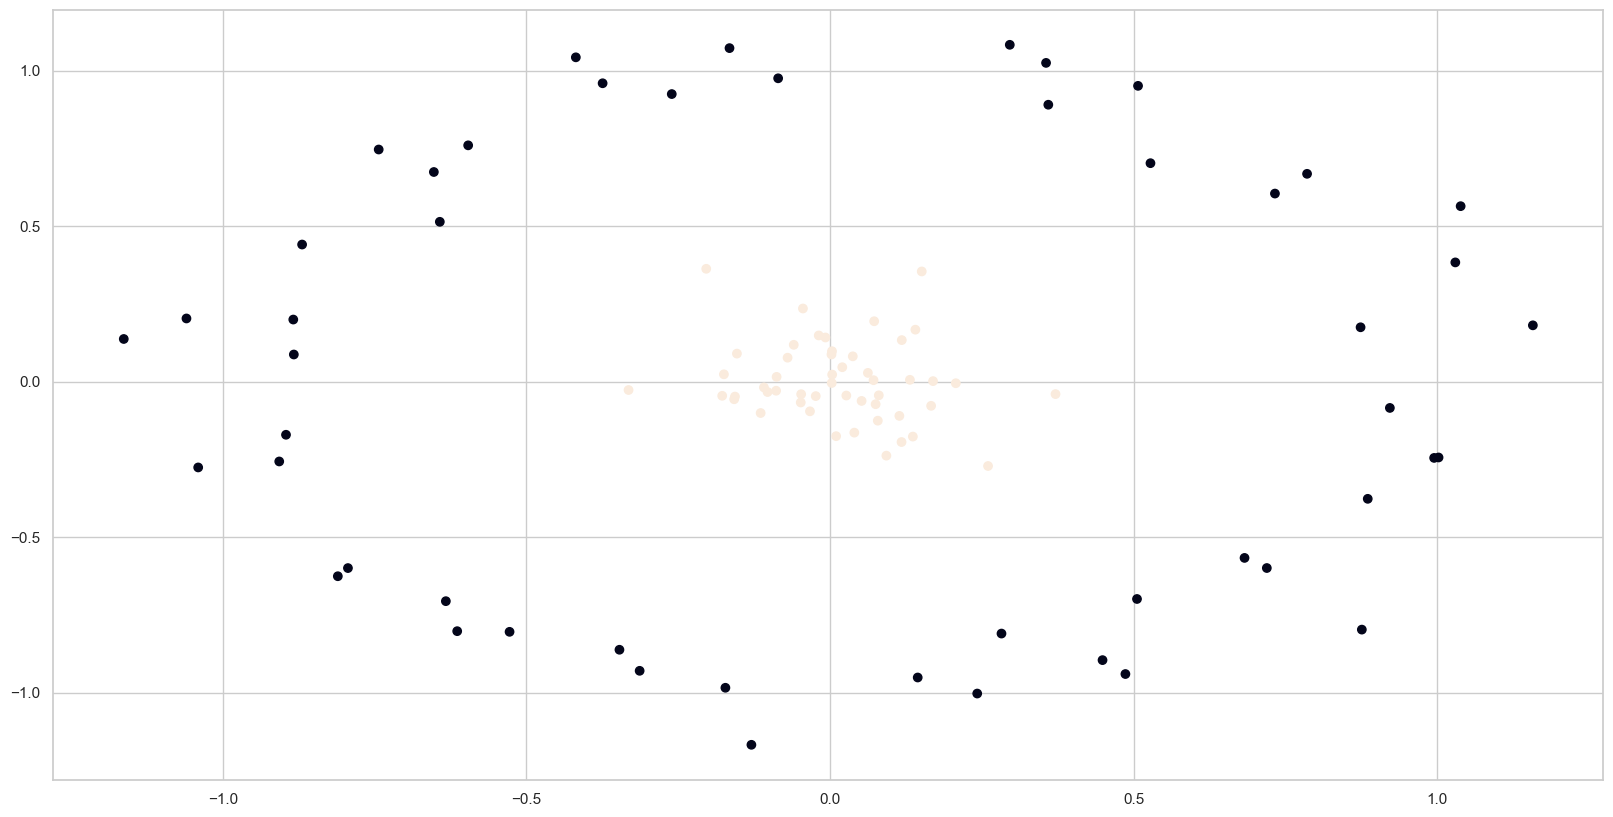

In [20]:
# implementing kernel SVM on a dataset

# create a non-linear dataset
from sklearn.datasets import make_circles
x, y = make_circles(100, factor = 0.1, noise = 0.1, random_state = 42)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

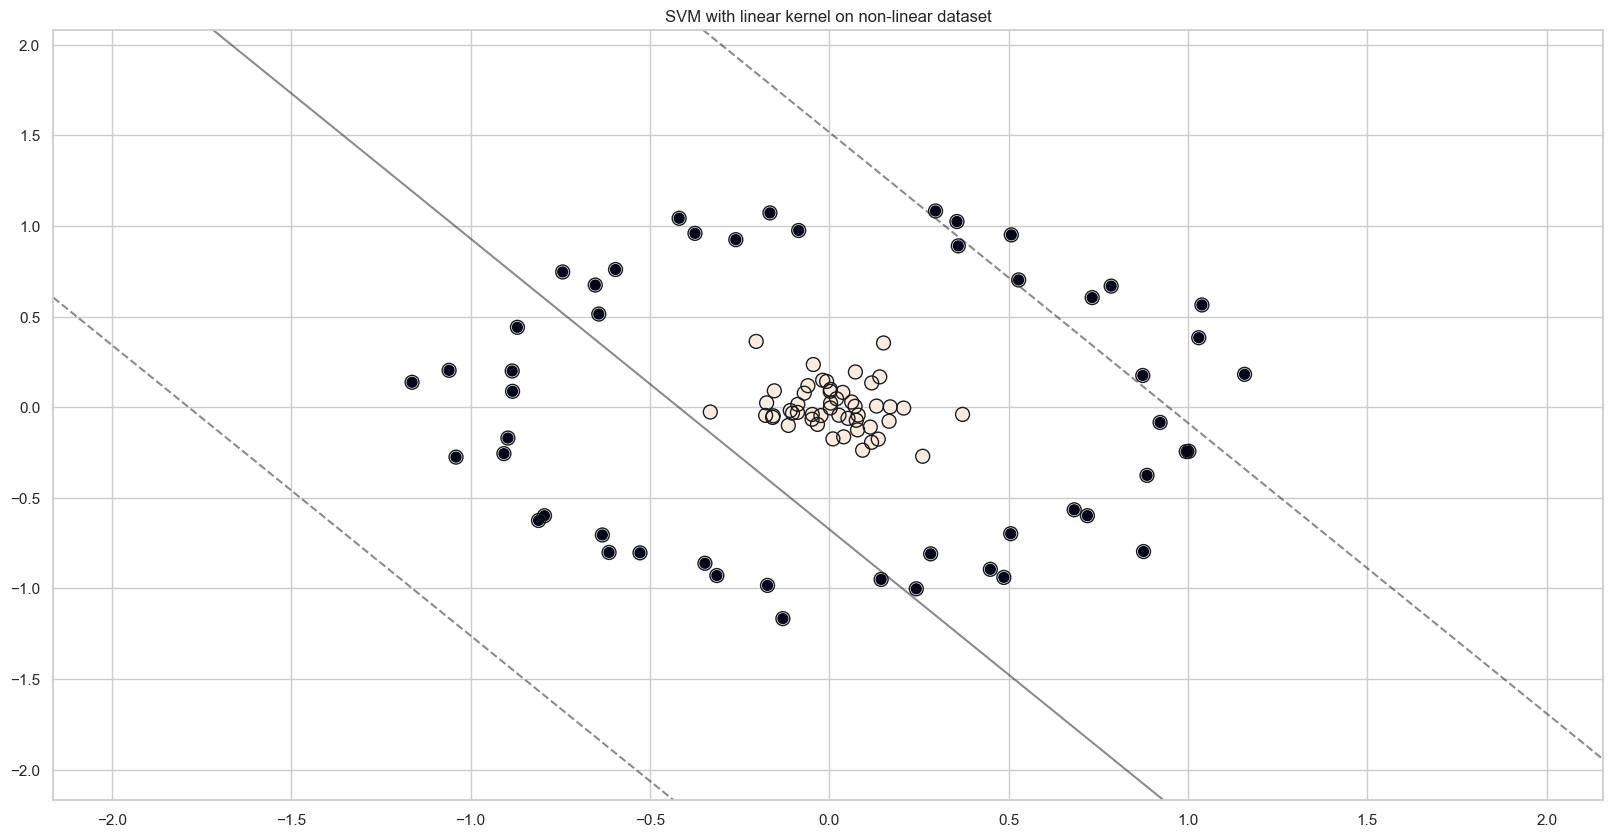

In [21]:
# linear kernel SVM
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

sv_classifier = SVC(kernel = "linear").fit(x, y)

# plot the decision function
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50)
plt.title("SVM with linear kernel on non-linear dataset")

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    sv_classifier,
    x,
    plot_method = "contour",
    colors = "k",
    levels = [-1, 0, 1],
    alpha = 0.5,
    linestyles = ["--", "-", "--"],
    ax = ax
)

# plot support vetors
ax.scatter(
    sv_classifier.support_vectors_[:, 0],
    sv_classifier.support_vectors_[:, 1],
    s = 100,
    linewidth = 1,
    facecolors = "none",
    edgecolors = "k"
)
plt.show()

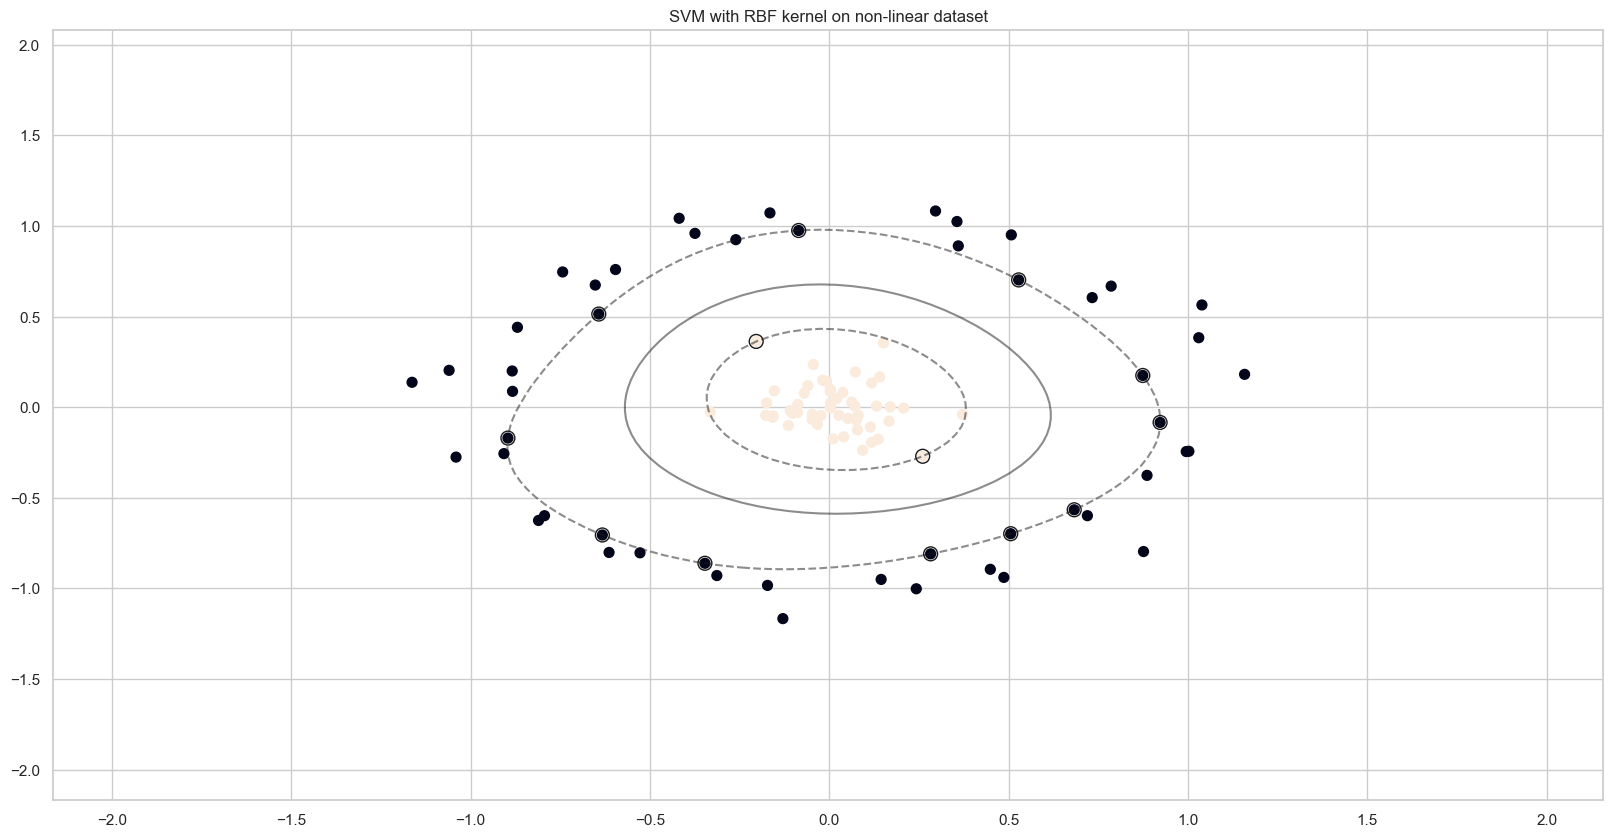

In [22]:
# linear kernel SVM
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

sv_classifier = SVC(kernel = "rbf", C = 1000000).fit(x, y)

# plot the decision function
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50)
plt.title("SVM with RBF kernel on non-linear dataset")

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    sv_classifier,
    x,
    plot_method = "contour",
    colors = "k",
    levels = [-1, 0, 1],
    alpha = 0.5,
    linestyles = ["--", "-", "--"],
    ax = ax
)

# plot support vetors
ax.scatter(
    sv_classifier.support_vectors_[:, 0],
    sv_classifier.support_vectors_[:, 1],
    s = 100,
    linewidth = 1,
    facecolors = "none",
    edgecolors = "k"
)
plt.show()

# Support Vector Machines For Regression Tasks (SVR)

# Hyperparameters In SVM
Support Vector Machines (SVMs) are powerful algorithms for classification tasks. However, their performance heavily relies on tuning certain parameters called hyperparameters.

### Kernel
- Function: The kernel function defines how the data is transformed before applying the linear decision boundary.
- Common choices:
    - Linear: Suitable for linearly separable data.
    - Polynomial: Can handle non-linear data by transforming it into higher dimesions.
    - RBF (Radial Basis Function): A popular choice for non-linear data, offering good flexibility.
- Impact: Choosing the right kernel significantly affects the model's ability to learn complex relationships in the data.

### Regularization parameter ($C$)
- Function: Controls the trade-off between maximizing the margin and allowing for misclassifications.
- Higher $C$: Enforces a larger margin, potentially leading to stricter classification but might be less robust to noise or outliers.
- Lower $C$: Allows for more misclassification but might result in smaller margin and potentially lower performance on unseen data.
- Impact: Tuning C is crucial to achieve a balance between accuracy and generalization.

### Gamma (for RBF kernel)
- Function: Controls the influence of a single data point on the overall decision boundary (only relevant for the RBF kernel).
- Higher Gamma: Leads to a more complex decision boundary, potentially fitting the training data well but at the risk of overfitting.
- Lower Gamma: Results in a smoother decision boundary, potentially leading to better generalization but might underfit complex data.
- Impact: Finding the right gamma value helps the model capture the appropriate level of detail in the data.

### Epsilon ($epsilon$)
- Function: Introducted in Soft Margin SVMs, it defines the tolerance for misclassifications.
- Higher Epsilon: Allows for more errors, potentially useful for noisy data.
- Lower Epsilon: Less tolerant of errors, aiming for stricter classification.
- Impact: Epsilon helps control the flexibility of the model and the number of misclassifications allowed during training.

### Tuning hyperparameters
There's no single "best" value for these hyperparameters. Finding the optimal combination often involves techniques like grid search or random search, which involve trying different combinations and evaluating their performance on a validation set.

# Metrics To Evaluate SVM
The choice of metrics to evaluate an SVM model depends on the specific problem that the model is being used to address, and the characteristics of the data.

### Accuracy
- This is the most basic metric, representing the proportion of correct predictions made by the model. It's calculated as the number of correctly classified samples divided by the total number of samples.
- Advantage: Easy to understand and interpret.
- Disadvantage: Can be misleading in imbalanced datasets where the majority class might dominate.

### Precision
- Precision measures the proportion of positive predictions that are actually correct. It tells how good the model is at identifying actual positives from the data it predicts as positive.
- Advantage: Useful when dealing with imbalanced datasets and the cost of false positives is high.
- Disadvantage: Does not consider the number of true negatives, which can be important depending on the problem.

### Recall
- Recall measures the proportion of actual positive cases that are correctly identified by the model. It tells how good the model is at finding all the relevant positive cases.
- Advantage: Useful when the cost of missing true positive is high (e.g., missing fraudulent transactions).
- Disadvantage: Does not consider the number of false positives, which can be a concern for some applications.

### F1-Score
- The F1 score is the harmonic mean of precision and recall. It provides a balance between the 2 metrics, giving a single score that considers both aspects.
- Advantage: Useful for summarizing overall performance when both precision and recall are important.
- Disadvantage: Can be lower than both precision and recall if they are significantly different.

### ROC AUC
- ROC curve plots the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds. AUC represents the total area under this curve.
- Advantage: ROC AUC is a good measure of model performance that is independent of class imbalance and classification thresholds. It considers all possible classification thresholds.
- Disadvantage: Does not directly provide insights into precision or recall at a specific threshold.

### Confusion Matrix
- This is a table that shows the number of correct and incorrect predictions made by the model for each class.
- Advantage: Provides a detailed breakdown of the model's performance on each class, including true positives, true negatives, false positives, and false negatives.
- Disadvantage: Can be overwhelming for datasets with many classes.

### Choosing the right metric
The best metric for the SVM model depends on the specific context. Consider,
- Data balance: If the dataset is imbalanced, accuracy might not be a good measure. Consider precision, recall, or F1-score.
- Cost of errors: If the cost of misclassifying a particular class is high, prioritize metrics like precision (for reducing flse positives) or recall (for reducing false negatives) depending on the costlier error type.
- Overall performance: If a single metric that summarizes the overall performance is needed, then F1 score can be a good choice.
- Detailed analysis: Use the confusion matrix for a deeper understanding of the model's strengths and weaknesses for each class.

# Bias-Variance Trade-Off In SVM
SVMs aim to find a hyperplane (decision boundary) that minimizes the margin between the two classes in the training data. However, there is a trade-off between,
- Low bias: This is achieved by using a complex model (e.g., a non-linear kernel) that can fit the training data more closely. However, this can also lead to high variance if the model becomes too sensitive to the specific data points.
- Low variance: This is achieved by using a simpler model (e.g., a linear kernel) that might not capture all the complexities of the data. This reduces the risk of overfitting but can lead to higher bias if the model is too simple to represent the true relationship between features and target variables.

### Controlling the trade-off in SVMs
The choice of kernel function plays a significant role,
- Linear kernel: Leads to a simpler model with lower varince but might have higher bias for non-linear data.
- Non-linear kernel (e.g., RBF): Allows for more complex decision boundaries, potentially reducing bias for non-linear data, but can also increase variance if not regularized properly.
- Regularization parameter ($C$): This parameter controls the trade-off between maximizing the margin and allowing for misclassifications in the training data.
- Higher $C$: Enforces a larger margin, potentially leading to a more complex model and lower bias but also potentially increasing variance.
- Lower $C$: Allows for more misclassifications, resulting in a simpler model with lower variance but potentially higher bias.

### Finding the optimal balance
The goal is to find the sweet spot between bias and variace for your specific SVM model. Techniques like hyperparameter tuning with tools like `GridSearchCV` can help to identify the kernel function and regularization parameter ($C$) that minimizes the overall prediction error on unseen data.

### Additional considerations
- There's no single best model for all situation. The optimal balance between bias and variance depends on the characteristics of the data and the specific problem that is being addressed.
- In some cases, even with careful tuning, SVMs might not be the best choice if the data is inherently very high-dimensional or complex.

# Overfitting And Underfitting In SVM
Overfitting and underfitting are common challenges faced when training SVMs.

### Overfitting
- Scenario: An SVM overfits when it learns the specific details and noise present in the training data too well. This can lead to a model that performs very well on the training data but fails to generalize well to unseen data.
- Symptoms:
    - High accuracy on the training set but significantly lower accuracy on the testing set.
    - The decision boundary becomes too complex, trying to fit every training data point exactly, including noise.
- Causes:
    - High model complexity: Using a non-linear kernel without proper regularization can lead to a complex decision boundary that memorizes noise.
    - Low regularization parameter ($C$): A low $C$ value allows for more misclassifications in the training data, potentially leading to a more flexible model that overfits.
    - Limited training data: With a small dataset, the model might not have enough generalizable patterns to learn from, leading it to focus on specific details of the training data.

### Underfitting
- Scenario: An SVM underfits when it fails to capture the underlying relationships between features and the target variable in the training data. This results in a model with a high bias that performs poorly on both the training and testing sets.
- Symptoms:
    - Low accuracy on both the training and testing sets.
    - The decision boundary is too simple, potentially a linear separation even for a non-linear data.
- Causes:
    - Low model complexity: Using a linear kernel for non-linear data might not be able to capture the true decision boundary, leading to underfitting.
    - High regularization parameter ($C$): A high $C$ value enforces a larger margin, potentially leading to a simpler model that might underfit complex data.
    - Irrelevant features: If the training data contains irrelevant features, the model might struggle to find the true relationships, leading to overfitting.

### Mitigating overfitting and underfitting
The following are some strategies to address these issues,
- Hyperparameter tuning: Use techniques like `GridSearchCV` to find the optimal combination of kernel function and regularization parameter ($C$) that balances model complexity and generalization.
- Data preprocesing: Techniques like normalization, scaling, and feature selection can improve the quality of the data and help the model learn more effectively.
- Early stopping: Stop training the model when the validation accuracy starts to decrease, preventing it from memorizing noise in the training data.
- Collect more data: If possible, increasing the size and diversity of the training data can help the model learn more generalizable patterns.

# Effect Of Outliers On SVM
Support Vector Machines (SVMs) are powerful classification algorithms, but they can be sensitive to outliers in the data.

### SVMs and the margin
- SVMs aim to find a hyperplane (decision boundary) that maximizes the margin between the two classes.
- The margin is the distance between the closest data points of each class, called the Support Vectors (SVs).

### The problem with outliers
- Outliers are data points that deviate significantly from the majority of the data.
- If an outlier belongs to the majority class and lies close to the minority class, it can pull the decision boundary towards itself.
- This can significantly reduce the margin for the minority class and lead to misclassifications.

### How do outliers effect SVMs?
- Reduced margin: Outliers can shrink the margin between classes, making it harder for the SVM to find a good separation.
- Misclassifications: The shifted decision boundary due to outliers can lead to misclassifying actual data points, especially those near the original margin.
- Increased training time: Outliers can make the optimization process of finding the optimal hyperplane more complex and time consuming.

### Strategies to handle outliers
- Data cleaning: If possible, identify and remove outliers that are genuine errors or noise in the data. However, it is important to excersice caution and not remove valid data points that might just be on the fringes of the distribution.
- Capping or winsorizing: Instead of removing outliers entirely, their values can be capped to a certain threshold or use winsorizing, which replaces extreme values with values from the tails of the distribution.
- Robust kernels: Some kernel functions used in SVMs, like Huber or Laplacian kernels are less sensitive to outliers compared to the standard linear kernel.
- One-class SVMs: For anomaly detection tasks, you can use one-class SVMs that focus on modeling the normal data distribution and identifying outliers that deviate significantly.

### Choosing the right approach
The best approach to handle outliers depends on the nature of the data and the specific problem that is being addressed. Consider the trade-off between removing potentially valuable data and the impact of outliers on the model's performance.

# Effect Of Data Imbalance On SVM
Support Vector Machines (SVMs) are powerful classification algorithm, but their performance can be significantly affected by data imbalance.

### The challenge
- SVMs primarily focus on the support vectors, which are the data points closest to the decision boundary.
- In a balanced dataset, these support vectors represent both classes fairly.

### The problem with imbalance
- When a dataset is imbalanced, the majority class has many more data points than the minority class.
- This can lead to the SVM focusing primarily on the majority class during training,
- The decision boundary might be biased towards the majority class, neglecting the minority class and potentially misclassifying them.

### Consequences of imbalance
- Reduced accuracy for minority class: The model might perform well on the majority class but poorly on the minority class, leading to a misleading overall accuracy score.
- Unreliable predctions: Predictions for the minority class becomes less trustworthy due to the model's limited exposure to those data points.

### Strategies to mitigate the effect
- Data oversamplingL Duplicate data points from the minority class to create a more balanced dataset. Be careful of overfitting in this case.
- Data undersampling: Randomly remove data points from the majority class to achieve balance. This reduces training data but can be computationally efficient.
- Cost-sensitive SVM: Assign higher weights to misclassifications of minority class during training. The penalizes the model more for mistakes on the minority class.
- Class weighting: Similar to cost-sensitive SVM, assign higher weights to the minority class during training.

### Choosing the right approach
The best approach depends on the specific dataset and the relative importance of accuracy for each class. Oversampling might not be ideal if the minority class data is already limited, while undersampling can discard potentially valuable information from the majority class.

### Additional considerations
- Evaluation metrics: Accuracy might not be the best metric for imbalanced dataset. Consider metrics like precision, recall, F1-score to assess performance for each class.
- SMOTE (Synthetic Minority Oversampling Technique): This technique generates synthetic data points for the minority class to achieve balance.

# Time And Space Complexity Of SVM
The time and space complexity of SVMs depend on several factors, including,
- Training method: The most common training methods for SVMs are based on Quadratic Programming (QP) which dominates the overall complexity.
- Dataset size: The number of data points ($n$) has a significant impact on both time and space complexity.
- Number of features ($p$): While not as dominant as $n$, the number of features in the data can also affct complexity.

### Time complexity
- The time complexity of training an SVM using a QP solver is generally considered to be $O(n^3)$ in the worst case. This means the training time increases cubically with the number of data points.
- However, in practice, the complexity can vary depending on the specific implementation and the characteristics of the data. Some algorithms might achieve slightly better complexity (e.g. close to $O(n^{2.5})$).

### Space complexity
The space complexity of training an SVM is typically $O(n^2)$. This is because the QP solver might need to store the entire kernel matrix, which scales quadratically with the number of data points.

### Factors affecting complexity
- Kernel choice: Kernel functions used in SVMs can also influence complexity. Linear kernels have lower complexity compared to non-linear kernels (e.g., RBF) which might involve additional computations.
- Sparsity: If the data is sparse (meaning many features have zero values), the complexity might be lower due to reduced computations in the kernel matrix.

### Additional notes
- Prediction time: Predicting the class label for a new data point is generally faster than training. It typically involves a dot product operation with the support vectors and has a complexity of $O(sv * p)$, where $sv$ is the number of support vectors and $p$ is the number of features.
- Scalability: Due to the cubic time complexity in the worst case, SVMs can become computationally expensive for very large datasets.